# 1.Data processing

In [1]:
import pandas as pd
import re

# Load the new dataset
df = pd.read_csv("amazon_cellphone_reviews.csv")

df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [2]:
# Drop unnecessary columns
df = df.drop(columns=['asin', 'name', 'date', 'verified', 'helpfulVotes'], errors='ignore')

# Drop rows with missing reviews.text
df = df.dropna(subset=['body'])

# Combine `title` and `body` to form a full review text
df['full_review'] = df['title'].fillna('') + " " + df['body']

df.head()

,rating,title,body,full_review
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ..."
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon..."
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a..."
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T..."


In [3]:
# Function to clean and preprocess text
def clean_text(text):
    if not isinstance(text, str):  # Ensure text is a string
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', ' ', text)  # Remove URLs
    text = re.sub(r'@\w+', ' ', text)  # Remove mentions (e.g., @user)
    text = re.sub(r'#\w+', ' ', text)  # Remove hashtags (e.g., #topic)
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize spaces
    return text

# Apply text cleaning
df['cleaned_text'] = df['full_review'].astype(str).apply(clean_text)

df.head()

,rating,title,body,full_review,cleaned_text
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ...",def not best but not worst i had the samsung a...
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...,text messaging doesn t work due to a software ...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon...",love this phone this is a great reliable phone...
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a...",love the phone but i love the phone and all be...
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T...",great phone service and options lousy case the...


In [4]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

nltk_stopwords = set(stopwords.words('english'))
custom_stopwords = set([
    "i", "me", "my", "we", "you", "your", "he", "she", "it", "is", "are", "was", "were", "be", 
    "been", "being", "have", "has", "had", "do", "does", "did", "a", "an", "the", "and", "but", 
    "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", 
    "between", "into", "through", "before", "after", "above", "below", "to", "from", "up", 
    "down", "in", "out", "on", "off", "over", "under", "again", "then", "once", "here", "there", 
    "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", 
    "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", 
    "can", "will", "just", "should", "now","cell", "mobile", "device", "phones", "product",
    "model", "screen", "case", "charger", "battery","camera","one", "two", "new", "old",
    "year", "years", "buy", "bought", "get", "got", "would", "use", "using", "used", "really", 
    "thing", "work", "works", "working", "well","el", "de", "que", "la", "es", "en", "lo"
])
final_stopwords = nltk_stopwords.union(custom_stopwords)

# Function to tokenize and remove stopwords
def simple_tokenization(text):
    words = text.split()  # Simple split-based tokenization
    words = [word for word in words if word not in final_stopwords]  # Remove stopwords
    return " ".join(words)

# Apply tokenization and stopword removal
df['tokenized_text'] = df['cleaned_text'].apply(simple_tokenization)

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,rating,title,body,full_review,cleaned_text,tokenized_text
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ...",def not best but not worst i had the samsung a...,def best worst samsung a600 awhile absolute do...
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...,text messaging doesn t work due to a software ...,text messaging due software issue nokia sprint...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon...",love this phone this is a great reliable phone...,love phone great reliable phone also purchased...
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a...",love the phone but i love the phone and all be...,love phone love phone need expect price bill r...
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T...",great phone service and options lousy case the...,great phone service options lousy phone great ...


In [5]:
# Import necessary modules for lemmatization
from nltk.stem import WordNetLemmatizer  # WordNetLemmatizer for reducing words to their base form
from nltk.corpus import wordnet  # Importing WordNet corpus
import nltk  # Natural Language Toolkit

# Download the WordNet corpus if not already downloaded
nltk.download("wordnet")

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'tokenized_text' column
df["lemmatized_review"] = df['tokenized_text'].apply(
    lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()])
)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,rating,title,body,full_review,cleaned_text,tokenized_text,lemmatized_review
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ...",def not best but not worst i had the samsung a...,def best worst samsung a600 awhile absolute do...,def best worst samsung a600 awhile absolute do...
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...,text messaging doesn t work due to a software ...,text messaging due software issue nokia sprint...,text messaging due software issue nokia sprint...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon...",love this phone this is a great reliable phone...,love phone great reliable phone also purchased...,love phone great reliable phone also purchased...
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a...",love the phone but i love the phone and all be...,love phone love phone need expect price bill r...,love phone love phone need expect price bill r...
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T...",great phone service and options lousy case the...,great phone service options lousy phone great ...,great phone service option lousy phone great e...


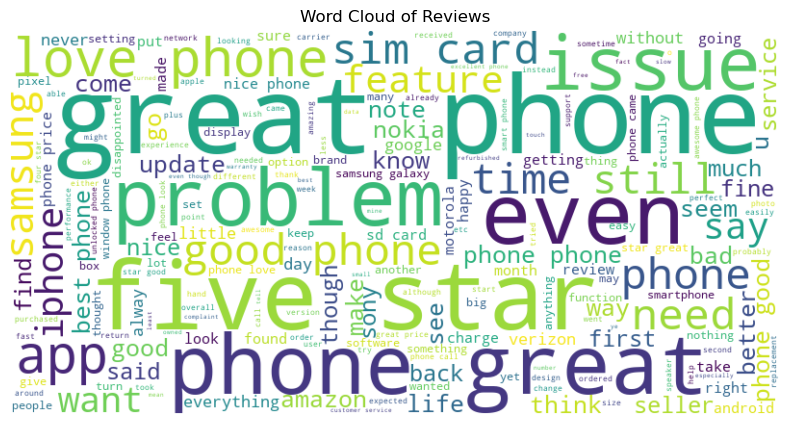

In [6]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Word Cloud Generation (Based on lemmatized_review)

text = " ".join(review for review in df['lemmatized_review'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews")
plt.show()

# 2.Sentiment

In [7]:
import pandas as pd

# Create new sentiment labels based on rating
def rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:  # 4,5
        return 'positive'

df['rating_sentiment'] = df['rating'].apply(rating_to_sentiment)
df.head()

,rating,title,body,full_review,cleaned_text,tokenized_text,lemmatized_review,rating_sentiment
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ...",def not best but not worst i had the samsung a...,def best worst samsung a600 awhile absolute do...,def best worst samsung a600 awhile absolute do...,neutral
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...,text messaging doesn t work due to a software ...,text messaging due software issue nokia sprint...,text messaging due software issue nokia sprint...,negative
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon...",love this phone this is a great reliable phone...,love phone great reliable phone also purchased...,love phone great reliable phone also purchased...,positive
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a...",love the phone but i love the phone and all be...,love phone love phone need expect price bill r...,love phone love phone need expect price bill r...,neutral
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T...",great phone service and options lousy case the...,great phone service options lousy phone great ...,great phone service option lousy phone great e...,positive


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9480\3080420897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['rating_sentiment'], palette="coolwarm", order=['negative', 'neutral', 'positive'])


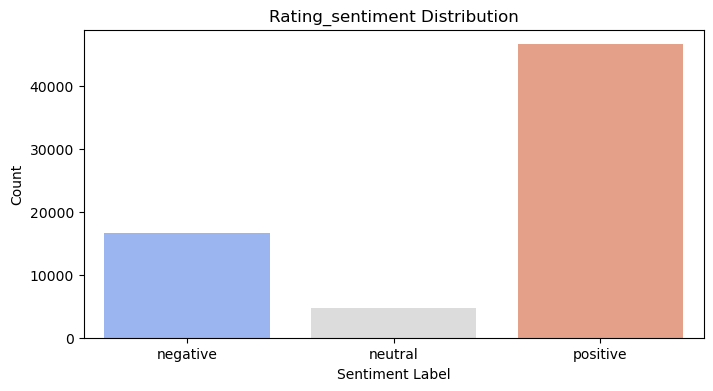

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Distribution Bar Chart
plt.figure(figsize=(8, 4))
sns.countplot(x=df['rating_sentiment'], palette="coolwarm", order=['negative', 'neutral', 'positive'])
plt.title("Rating_sentiment Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

## 2.1 VADER

In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
df['VADER_sentiment_score'] = df['lemmatized_review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Classify sentiment based on compound score
df['VADER_sentiment_label'] = df['VADER_sentiment_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)
df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,rating,title,body,full_review,cleaned_text,tokenized_text,lemmatized_review,rating_sentiment,VADER_sentiment_score,VADER_sentiment_label
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,"Def not best, but not worst I had the Samsung ...",def not best but not worst i had the samsung a...,def best worst samsung a600 awhile absolute do...,def best worst samsung a600 awhile absolute do...,neutral,0.8126,positive
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,Text Messaging Doesn't Work Due to a software ...,text messaging doesn t work due to a software ...,text messaging due software issue nokia sprint...,text messaging due software issue nokia sprint...,negative,0.8625,positive
2,5,Love This Phone,"This is a great, reliable phone. I also purcha...","Love This Phone This is a great, reliable phon...",love this phone this is a great reliable phone...,love phone great reliable phone also purchased...,love phone great reliable phone also purchased...,positive,0.9360,positive
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did...","Love the Phone, BUT...! I love the phone and a...",love the phone but i love the phone and all be...,love phone love phone need expect price bill r...,love phone love phone need expect price bill r...,neutral,0.9509,positive
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,"Great phone service and options, lousy case! T...",great phone service and options lousy case the...,great phone service options lousy phone great ...,great phone service option lousy phone great e...,positive,0.9596,positive


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9480\2446203490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['VADER_sentiment_label'], palette="coolwarm")


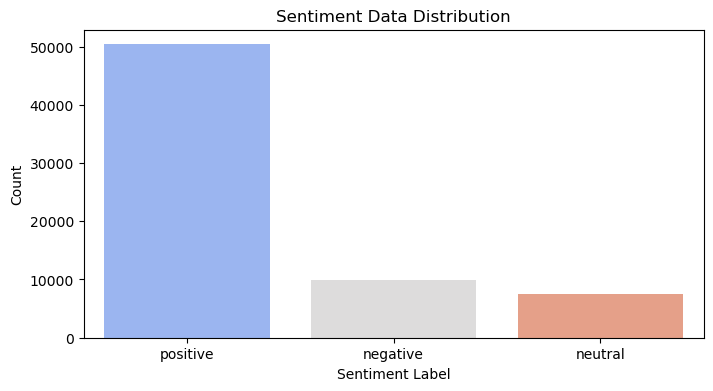

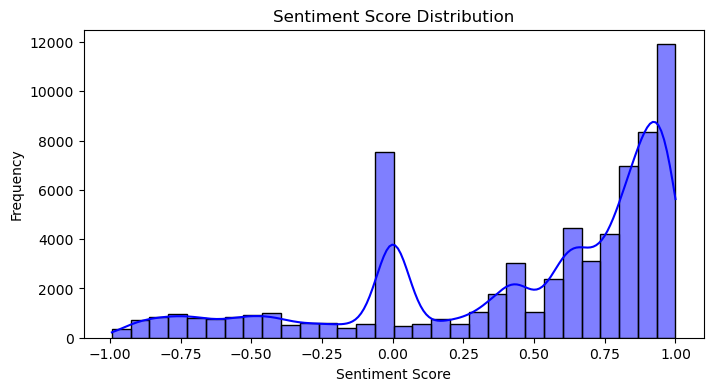

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sentiment Distribution Bar Chart
plt.figure(figsize=(8, 4))
sns.countplot(x=df['VADER_sentiment_label'], palette="coolwarm")
plt.title("Sentiment Data Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

# 2. Sentiment Score Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['VADER_sentiment_score'], bins=30, kde=True, color="blue")
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

### 2.2 logistic regression model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Remove neutral data to perform binary classification
df_binary = df[df['rating_sentiment'] != 'neutral'].copy()

# Define features (X) and target variable (y)
X = df_binary['lemmatized_review']
y = df_binary['rating_sentiment'].map({'positive': 1, 'negative': 0})

# Get half of dataset
df_half = df_binary.sample(frac=0.5, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_half['lemmatized_review'], df_half['rating_sentiment'].map({'positive': 1, 'negative': 0}), 
    test_size=0.2, random_state=42, stratify=df_half['rating_sentiment'])

# Vectorize text data using TF-IDF (train only on training set)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_vec, y_train)

# Predict sentiment labels on the test set
y_pred = model.predict(X_test_vec)

# Calculate accuracy scores
train_acc = model.score(X_train_vec, y_train)
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.9482
Test Accuracy: 0.9302


In [16]:

df_remaining_half = df_binary.drop(df_half.index)  
X_remaining_vec = vectorizer.transform(df_remaining_half['lemmatized_review'])
df_remaining_half['logistic_sentiment'] = model.predict(X_remaining_vec)
df_remaining_half['logistic_sentiment'] = df_remaining_half['logistic_sentiment'].map({1: 'positive', 0: 'negative'})

y_remaining_true = df_remaining_half['rating_sentiment'].map({'positive': 1, 'negative': 0})
y_remaining_pred = model.predict(X_remaining_vec)

print("\nClassification Report on Remaining 50% Data:")
print(classification_report(y_remaining_true, y_remaining_pred, target_names=['negative', 'positive']))

overall_acc = accuracy_score(y_remaining_true, y_remaining_pred)
print(f"\nOverall Accuracy on Remaining 50% Data: {overall_acc:.4f}")

print("\nPredicted Sentiment Labels for Remaining 50% of Data:")
print(df_remaining_half[['lemmatized_review', 'logistic_sentiment']].head(10))  # 只显示前 10 条预测结果


Classification Report on Remaining 50% Data:
              precision    recall  f1-score   support

    negative       0.90      0.84      0.87      8335
    positive       0.94      0.97      0.96     23269

    accuracy                           0.93     31604
   macro avg       0.92      0.90      0.91     31604
weighted avg       0.93      0.93      0.93     31604


Overall Accuracy on Remaining 50% Data: 0.9330

Predicted Sentiment Labels for Remaining 50% of Data:
                                    lemmatized_review logistic_sentiment
4   great phone service option lousy phone great e...           positive
7   problem 3588i universal headset 3599i overall ...           positive
11  slow annoying fragile heavy bulky 1 slow want ...           negative
12  worth paying something else phone ago ever sin...           negative
13  great free phone sprint customer excellent cho...           positive
15  exellent service nextel nearly started time la...           positive
17     locked

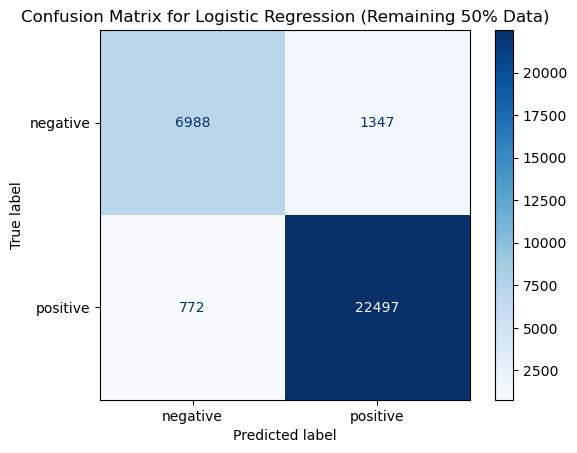

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix for the remaining 50% of the data
cm_remaining = confusion_matrix(y_remaining_true, y_remaining_pred)

# Create and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_remaining, display_labels=['negative', 'positive'])
disp.plot(cmap='Blues')

# Set title and labels
plt.title('Confusion Matrix for Logistic Regression (Remaining 50% Data)')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Show the confusion matrix
plt.show()

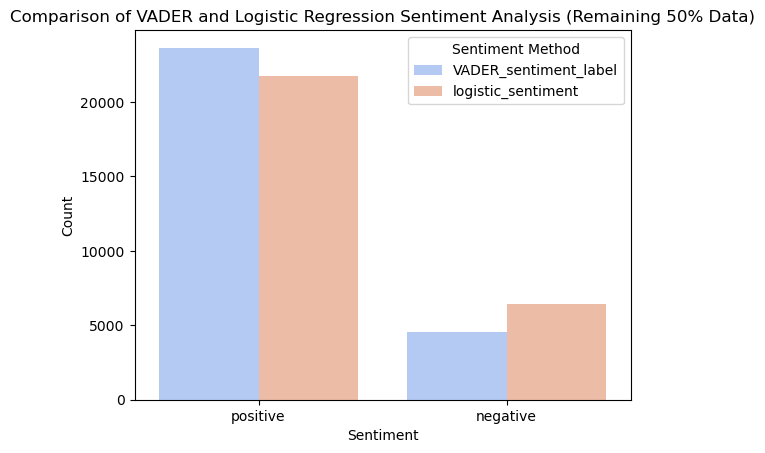

VADER Sentiment Accuracy (Remaining 50% Data): 0.8679
Logistic Regression Accuracy (Remaining 50% Data): 0.9379


In [19]:
# Prepare data for visualization comparing VADER and Logistic Regression predictions
# Ensure df_remaining_half has both VADER and logistic regression sentiment labels
df_filtered = df_remaining_half[
    (df_remaining_half['VADER_sentiment_label'] != 'neutral') & 
    (df_remaining_half['logistic_sentiment'] != 'neutral')
]

# Reshape data for visualization comparing VADER and Logistic Regression predictions
df_melted = pd.melt(df_filtered, value_vars=['VADER_sentiment_label', 'logistic_sentiment'], 
                    var_name='Sentiment Method', value_name='Sentiment')

# Plot the comparison of sentiment predictions between VADER and Logistic Regression
sns.countplot(x='Sentiment', hue='Sentiment Method', data=df_melted, palette="coolwarm")
plt.title("Comparison of VADER and Logistic Regression Sentiment Analysis (Remaining 50% Data)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title="Sentiment Method")
plt.show()

# Calculate VADER accuracy based on the remaining 50% of the dataset
vader_acc = accuracy_score(df_filtered['rating_sentiment'], df_filtered['VADER_sentiment_label'])

# Print accuracy scores
print(f"VADER Sentiment Accuracy (Remaining 50% Data): {vader_acc:.4f}")
print(f"Logistic Regression Accuracy (Remaining 50% Data): {logistic_acc:.4f}")

## 3.LDA

In [12]:
df['lemmatized_review'] = df['lemmatized_review'].apply(lambda x: x.split())

Num Topics: 2, Coherence Score: 0.3172
Num Topics: 3, Coherence Score: 0.3201
Num Topics: 4, Coherence Score: 0.4049
Num Topics: 5, Coherence Score: 0.3142
Num Topics: 6, Coherence Score: 0.3291
Num Topics: 7, Coherence Score: 0.3192
Num Topics: 8, Coherence Score: 0.3329
Num Topics: 9, Coherence Score: 0.3286
Num Topics: 10, Coherence Score: 0.3022
Num Topics: 11, Coherence Score: 0.3350
Num Topics: 12, Coherence Score: 0.3076
Num Topics: 13, Coherence Score: 0.3234
Num Topics: 14, Coherence Score: 0.3402
Num Topics: 15, Coherence Score: 0.3288
Num Topics: 16, Coherence Score: 0.3368
Num Topics: 17, Coherence Score: 0.3192
Num Topics: 18, Coherence Score: 0.3301
Num Topics: 19, Coherence Score: 0.3202


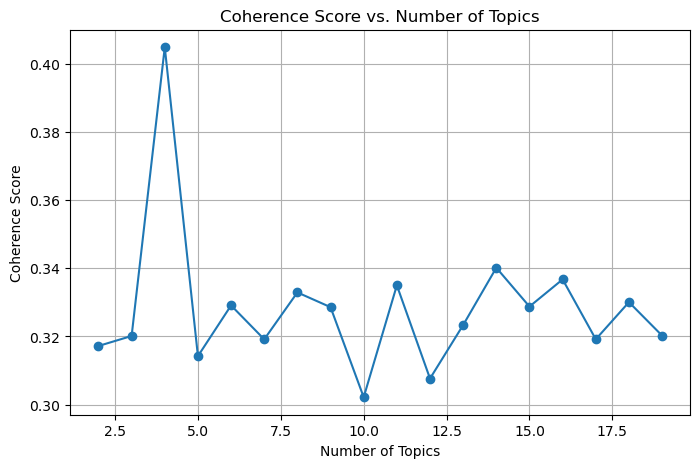

Optimal Number of Topics: 4


In [13]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel

# randomly sample 2000 rows from your DataFrame
df_sampled = df.sample(n=2000, random_state=42).reset_index(drop=True)

# proceed with tokenization and LDA analysis
tokenized_texts = df_sampled['lemmatized_review'].tolist()
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Function to compute coherence scores for different topic numbers
def compute_coherence_values(dictionary, corpus, texts, topic_range):
    coherence_scores = []
    for num_topics in topic_range:
        # Train LDA model
        lda_model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=10,   
            iterations=300
        )
        
        # Compute coherence score
        coherence_model = CoherenceModel(
            model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v'
        )
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)
        
        print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

    return coherence_scores

# Define topic range and compute coherence scores
topic_range = range(2, 20)
coherence_scores = compute_coherence_values(dictionary, corpus, tokenized_texts, topic_range)

plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.grid()
plt.show()

# Determine the optimal number of topics
optimal_topic_num = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal Number of Topics: {optimal_topic_num}")


In [15]:
import gensim
import gensim.corpora as corpora

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df['lemmatized_review'])  # Create a dictionary from tokens
corpus = [dictionary.doc2bow(text) for text in df['lemmatized_review']]  # Convert tokens into bag-of-words format

# Train the LDA model
num_topics = 4
lda_model = gensim.models.LdaModel(
    corpus=corpus, 
    num_topics=num_topics,  # Define the number of topics
    id2word=dictionary, 
    passes=10, 
    iterations=300, 
    random_state=42
)

# Display the top words for each topic
print("\n=== LDA Topics ===")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx+1}: {topic}")

# Assign topics to each review
df['topic_distribution'] = df['lemmatized_review'].apply(lambda x: lda_model.get_document_topics(dictionary.doc2bow(x)))

# Display the first few results
print(df[['full_review', 'topic_distribution']].head())



=== LDA Topics ===
Topic 1: 0.057*"phone" + 0.008*"time" + 0.008*"issue" + 0.007*"day" + 0.007*"back" + 0.006*"even" + 0.006*"call" + 0.005*"problem" + 0.005*"2" + 0.005*"like"
Topic 2: 0.108*"phone" + 0.053*"great" + 0.042*"good" + 0.028*"price" + 0.024*"love" + 0.017*"best" + 0.015*"life" + 0.014*"nice" + 0.013*"quality" + 0.013*"fast"
Topic 3: 0.084*"phone" + 0.044*"great" + 0.032*"good" + 0.022*"came" + 0.018*"sim" + 0.018*"like" + 0.018*"unlocked" + 0.016*"brand" + 0.014*"condition" + 0.014*"perfect"
Topic 4: 0.012*"android" + 0.010*"fingerprint" + 0.008*"muy" + 0.008*"excelente" + 0.006*"video" + 0.006*"con" + 0.006*"pixel" + 0.006*"iphone" + 0.005*"sony" + 0.005*"apps"
                                         full_review  \
0  Def not best, but not worst I had the Samsung ...   
1  Text Messaging Doesn't Work Due to a software ...   
2  Love This Phone This is a great, reliable phon...   
3  Love the Phone, BUT...! I love the phone and a...   
4  Great phone service and options